In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
data  = pd.read_csv('AirPassengers.csv')
data.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [3]:
col_names = ['Month','Passengers']

In [4]:
data.columns= col_names

In [5]:
data.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [6]:
df = pd.DataFrame()
df['Passengers(t)'] = data['Passengers']
df['Passengers(t+1)'] = data['Passengers'].shift(-1)

In [7]:
df.head()

Passengers(t)  Passengers(t+1)
0            112            118.0
1            118            132.0
2            132            129.0
3            129            121.0
4            121            135.0

In [8]:
df.isnull().sum()

Passengers(t)      0
Passengers(t+1)    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Passengers(t)      0
Passengers(t+1)    0
dtype: int64

# Split the data into train and test sets

In [11]:
df.columns

Index(['Passengers(t)', 'Passengers(t+1)'], dtype='object')

In [12]:
X = df[['Passengers(t)']]
y = df['Passengers(t+1)']

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale the data

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build the model 

In [15]:
from keras.models import Sequential
from keras.layers import LSTM , Dense



In [16]:
# X_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
# x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [17]:
model_sgd = Sequential()
model_sgd.add(LSTM(32,input_shape=(1,1)))
model_sgd.add(Dense(1))

model_sgd.compile(loss='mean_squared_error',optimizer='sgd')

model_sgd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model_sgd.fit(x_train,y_train,epochs=50,batch_size=1,verbose=2)

Epoch 1/50
114/114 - 2s - loss: 7345.5879 - 2s/epoch - 22ms/step
Epoch 2/50
114/114 - 1s - loss: 2653.4165 - 586ms/epoch - 5ms/step
Epoch 3/50
114/114 - 0s - loss: 2933.7700 - 474ms/epoch - 4ms/step
Epoch 4/50
114/114 - 0s - loss: 2547.8772 - 478ms/epoch - 4ms/step
Epoch 5/50
114/114 - 0s - loss: 2168.4690 - 398ms/epoch - 3ms/step
Epoch 6/50
114/114 - 0s - loss: 1950.9707 - 408ms/epoch - 4ms/step
Epoch 7/50
114/114 - 0s - loss: 2184.3816 - 336ms/epoch - 3ms/step
Epoch 8/50
114/114 - 0s - loss: 1859.3413 - 371ms/epoch - 3ms/step
Epoch 9/50
114/114 - 0s - loss: 1956.9569 - 357ms/epoch - 3ms/step
Epoch 10/50
114/114 - 0s - loss: 1745.1595 - 341ms/epoch - 3ms/step
Epoch 11/50
114/114 - 0s - loss: 1673.6517 - 438ms/epoch - 4ms/step
Epoch 12/50
114/114 - 0s - loss: 1904.3269 - 401ms/epoch - 4ms/step
Epoch 13/50
114/114 - 0s - loss: 1922.8254 - 390ms/epoch - 3ms/step
Epoch 14/50
114/114 - 0s - loss: 1942.8199 - 314ms/epoch - 3ms/step
Epoch 15/50
114/114 - 0s - loss: 2351.6277 - 337ms/epoch - 

In [19]:
hist.history.keys()

dict_keys(['loss'])

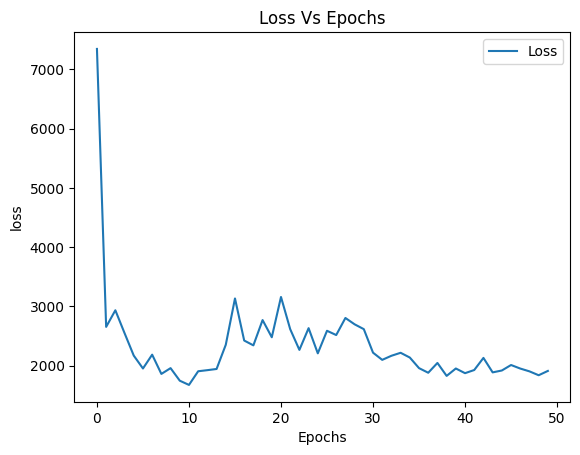

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Loss Vs Epochs')
plt.show()
